In [1]:
import numpy as np
import matplotlib.pyplot as plt

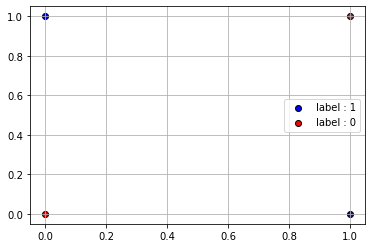

In [2]:
# XOR inputs & Corresponding outputs
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y_train = np.array([0, 1, 1, 0])

plt.scatter(X_train.T[Y_train==1][:, 0], X_train.T[Y_train==1][:, 1], color='b', edgecolor='k', label='label : 1')
plt.scatter(X_train.T[Y_train==0][:, 0], X_train.T[Y_train==0][:, 1], color='r', edgecolor='k', label='label : 0')
plt.grid(True)
plt.legend()

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# ReLU 함수정의
def ReLU(z):
    #return z * (z > 0)
    return np.maximum(0, z)

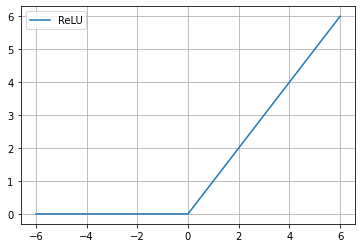

In [5]:
x_range = np.linspace(-6, 6, 500)
plt.plot(x_range, ReLU(x_range), label="ReLU")
plt.grid(True)
plt.legend()

In [6]:
def layer_sizes(X, Y):
    """   
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [7]:
# 2차원 데이터가 네 개
X = np.array([[-0.00416758, -0.00056267],
              [-0.02136196,  0.01640271],
              [-0.01793436, -0.00841747],
              [ 0.00502881, -0.01245288]]).T

# 1차원 데이터가 네 개
Y = np.array([[1.0],
              [0.0],
              [0.0],
              [1.0]]).T

print(layer_sizes(X, Y))

(2, 4, 1)


In [8]:
def initialize_parameters(n_x, n_h, n_y, init_scale_factor=1.0):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2019)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * init_scale_factor
    b1 = np.random.randn(n_h, 1) * init_scale_factor
    W2 = np.random.randn(n_y, n_h) * init_scale_factor
    b2 = np.random.randn(n_y, 1) * init_scale_factor
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [9]:
n_x, n_h, n_y = layer_sizes(X, Y)

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.21767896  0.82145535]
 [ 1.48127781  1.33186404]
 [-0.36186537  0.68560883]
 [ 0.57376143  0.28772767]]
b1 = [[-0.23563426]
 [ 0.95349024]
 [-1.6896253 ]
 [-0.34494271]]
W2 = [[ 0.0169049  -0.51498352  0.24450929 -0.18931261]]
b2 = [[2.67217242]]


In [10]:
def forward(X, parameters):
    """
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2(=Yhat) (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [11]:
n_x, n_h, n_y = layer_sizes(X, Y)
parameters = initialize_parameters(n_x, n_h, n_y)

A2, cache = forward(X, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

-0.3337054329700906 0.23439551512549126 2.18933310608959 0.899285984710742


$ J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \Big\{ y^{(i)}\log\left(\hat{y}^{(i)}\right) + (1-y^{(i)})\log\left(1- \hat{y}^{(i)}\right) \Big\} $

In [12]:
def compute_cost(A2, Y, parameters):
    """
    Returns: 
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    
    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = -np.multiply(np.log(A2), Y) - np.multiply((1 - Y), np.log(1 - A2))
    cost = np.sum(logprobs) / m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # 파이썬 숫자로 출력하기 위함 (E.g., turns [[17]] into 17)
    
    return cost

In [13]:
Y

array([[1., 0., 0., 1.]])

In [14]:
A2 = np.array([[0.01],
               [0.01],
               [0.01],
               [0.99]]).T

print("cost = " + str(compute_cost(A2, Y, parameters)))

cost = 1.1588302983871486


dW1 = $\dfrac{\partial J(w) }{ \partial W_1 }$, db1 = $\dfrac{\partial J(w) }{ \partial b_1 }$ , dW2 = $\dfrac{\partial J(w) }{ \partial W_2 }$, db2 = $\dfrac{\partial J(w) }{ \partial b_2 }$

In [15]:
def backward(parameters, cache, X, Y):
    """
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve also A1, Z1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    Z1 = cache['Z1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 8 lines of code, corresponding to 7 equations on slide above)
    dZ2= (A2 - Y) / m
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dA1[Z1 < 0] = 0
    dZ1 = dA1
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [16]:
# 2차원 데이터가 네 개
X = np.array([[-0.00416758, -0.00056267],
              [-0.02136196,  0.01640271],
              [-0.01793436, -0.00841747],
              [ 0.00502881, -0.01245288]]).T

# 1차원 데이터가 네 개
Y = np.array([[1.0],
              [0.0],
              [0.0],
              [1.0]]).T

n_x, n_h, n_y = layer_sizes(X, Y)
parameters = initialize_parameters(n_x, n_h, n_y)
A2, cache = forward(X, parameters)

grads = backward(parameters, cache, X, Y)

print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.          0.        ]
 [ 0.00456242 -0.00109213]
 [ 0.          0.        ]
 [ 0.          0.        ]]
db1 = [[ 0.       ]
 [-0.2056257]
 [ 0.       ]
 [ 0.       ]]
dW2 = [[0.         0.37041662 0.         0.        ]]
db2 = [[0.39928598]]


 $ \theta = \theta - \alpha \dfrac{\partial J(w) }{ \partial \theta }$

In [17]:
def update_parameters(parameters, grads, learning_rate=0.01):
    """    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
# 2차원 데이터가 네 개
X = np.array([[-0.00416758, -0.00056267],
              [-0.02136196,  0.01640271],
              [-0.01793436, -0.00841747],
              [ 0.00502881, -0.01245288]]).T

# 1차원 데이터가 네 개
Y = np.array([[1.0],
              [0.0],
              [0.0],
              [1.0]]).T

n_x, n_h, n_y = layer_sizes(X, Y)
parameters = initialize_parameters(n_x, n_h, n_y)
A2, cache = forward(X, parameters)
grads = backward(parameters, cache, X, Y)
parameters = update_parameters(parameters, grads, learning_rate=1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.21767896  0.82145535]
 [ 1.47580291  1.33317459]
 [-0.36186537  0.68560883]
 [ 0.57376143  0.28772767]]
b1 = [[-0.23563426]
 [ 1.20024109]
 [-1.6896253 ]
 [-0.34494271]]
W2 = [[ 0.0169049  -0.95948347  0.24450929 -0.18931261]]
b2 = [[2.19302924]]


In [19]:
def NN_2L(X, Y, n_h, num_iterations=10000, init_scale_factor=1.0, learning_rate=0.01, print_cost=False):
    """
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y, init_scale_factor)

    # print(n_x, n_h, n_y) 
    parameters['W1']
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward(parameters, cache, X, Y)
        

        #print(Y)     

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration [%i/%i]: %f" % (i, num_iterations, cost))

    return parameters

In [20]:
# 2차원 데이터가 네 개
X = np.array([[-0.00416758, -0.00056267],
              [-0.02136196,  0.01640271],
              [-0.01793436, -0.00841747],
              [ 0.00502881, -0.01245288]]).T

# 1차원 데이터가 네 개
Y = np.array([[1.0],
              [0.0],
              [0.0],
              [1.0]]).T

_, n_h, _ = layer_sizes(X, Y)

parameters = NN_2L(X, Y, n_h, num_iterations=100, init_scale_factor=0.01, learning_rate=1.2, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00217679  0.00821455]
 [ 0.01277714  0.01438233]
 [-0.00361865  0.00685609]
 [ 0.00573761  0.00287728]]
b1 = [[-0.00235634]
 [ 0.00967222]
 [-0.01689625]
 [-0.00344943]]
W2 = [[ 0.00016905 -0.00159181  0.00244509 -0.00189313]]
b2 = [[1.61856595e-05]]


In [21]:
def predict(parameters, X):
    """
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward(X, parameters)
    predictions = np.round(A2)
    ### END CODE HERE ###
    
    return predictions

In [22]:
predictions = predict(parameters, X)
print(predictions)

[[1. 1. 1. 1.]]


In [23]:
# Accuracy 계산
def get_accuracy(parameters, X, Y):
    m = X.shape[1]
    predictions = predict(parameters, X)
    return (predictions == Y).sum() / m

In [24]:
print(get_accuracy(parameters, X, Y))

0.5


In [25]:
# XOR inputs & Corresponding outputs
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y_train = np.array([[0, 1, 1, 0]])

In [26]:
parameters = NN_2L(X_train, Y_train, n_h=2, num_iterations=10000, learning_rate=0.1, print_cost=True)
print('Train acc : {:.2%}'.format(get_accuracy(parameters, X_train, Y_train)))

Cost after iteration [0/10000]: 0.718675
Cost after iteration [1000/10000]: 0.474710
Cost after iteration [2000/10000]: 0.048546
Cost after iteration [3000/10000]: 0.015586
Cost after iteration [4000/10000]: 0.008793
Cost after iteration [5000/10000]: 0.006024
Cost after iteration [6000/10000]: 0.004544
Cost after iteration [7000/10000]: 0.003631
Cost after iteration [8000/10000]: 0.003014
Cost after iteration [9000/10000]: 0.002572
Train acc : 100.00%


In [27]:
#A2, _ = forward(X_train, parameters)
print(predict(parameters, X_train))
print(Y_train)

[[0. 1. 1. 0.]]
[[0 1 1 0]]


In [28]:
import h5py

In [29]:
def load_dataset():
    train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig.reshape(-1), test_set_x_orig, test_set_y_orig.reshape(-1), classes

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.
Y_train = Y_train_orig.reshape(1, -1)
Y_test = Y_test_orig.reshape(1, -1)

In [30]:
parameters = NN_2L(X_train, Y_train, n_h=7, num_iterations=10000, init_scale_factor=0.01, learning_rate=0.0075, print_cost=True)

Cost after iteration [0/10000]: 0.691478
Cost after iteration [1000/10000]: 0.319468
Cost after iteration [2000/10000]: 0.051610
Cost after iteration [3000/10000]: 0.019406
Cost after iteration [4000/10000]: 0.010624
Cost after iteration [5000/10000]: 0.006973
Cost after iteration [6000/10000]: 0.005064
Cost after iteration [7000/10000]: 0.003919
Cost after iteration [8000/10000]: 0.003167
Cost after iteration [9000/10000]: 0.002640


In [31]:
print('Train acc : {:.2%}'.format(get_accuracy(parameters, X_train, Y_train)))
print('Test acc : {:.2%}'.format(get_accuracy(parameters, X_test, Y_test)))

Train acc : 100.00%
Test acc : 72.00%


C:\Users\chinkwan80\anaconda3\envs\tf21\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


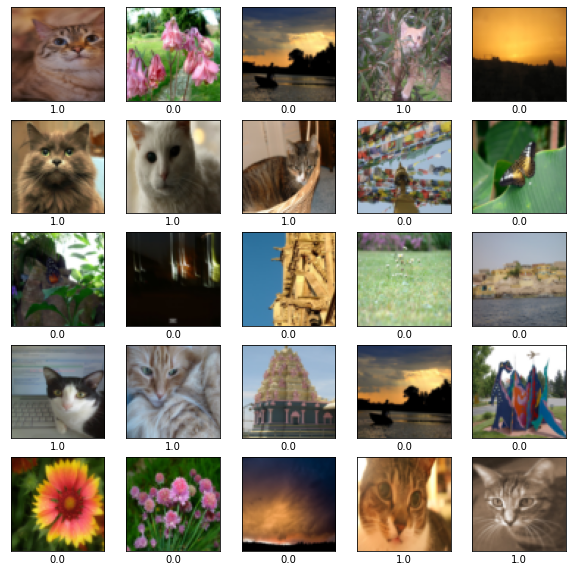

In [32]:
rndsuff = np.random.randint(0, len(X_train_orig)-1, size=len(X_train_orig), dtype='l')

# Sow images and labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[rndsuff[i]], cmap=plt.cm.binary)
    plt.xlabel(predict(parameters, X_train_flatten).T[rndsuff[i]][0])
plt.show()

C:\Users\chinkwan80\anaconda3\envs\tf21\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


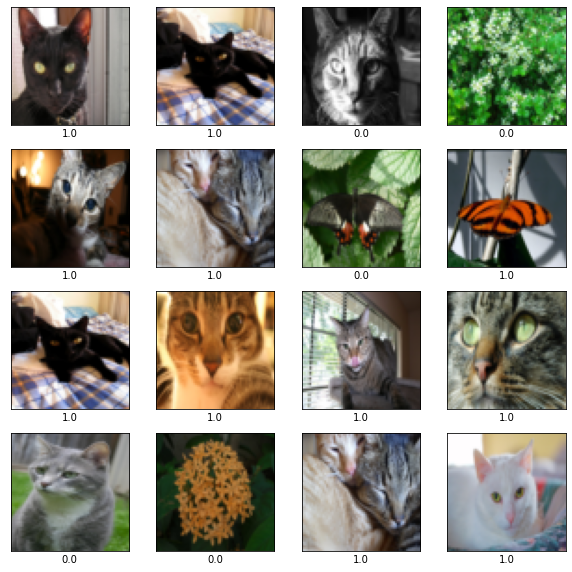

In [33]:
rndsuff = np.random.randint(0, len(X_test_orig)-1, size=len(X_test_orig), dtype='l')

# Show images and labels
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_orig[rndsuff[i]], cmap=plt.cm.binary)
    plt.xlabel(predict(parameters, X_test_flatten).T[rndsuff[i]][0])
plt.show()